<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas Manuela Guisao Sepulveda


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1} y x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}




El error en la la aproximación de segundo orden es:
\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.


2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.
https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv



3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import gradient


In [ ]:
def diferencia_centrales(func,x,h):
  derivada= (func(x+h)-func(x-h))/(2*h)
  return derivada

In [ ]:
func= lambda x: np.exp(x**2)*np.sin(x)
x= np.linspace(-1,1,1000)
derivada= diferencia_centrales(func,x ,h=1E-2) #codigo vectoriza

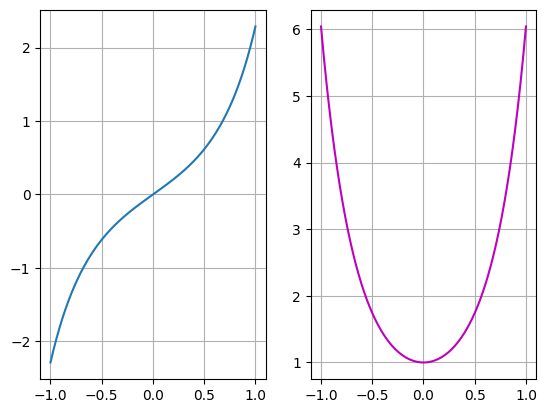

In [ ]:
func= lambda x: np.exp(x**2)*np.sin(x)
x= np.linspace(-1,1,1000)
fig,ax= plt.subplots(ncols=2, nrows=1)
ax[0].plot(x,func(x))
ax[0].grid()


derivada = diferencia_centrales(func, x, h=1E-2)
ax[1].plot(x,derivada, 'm')
ax[1].grid()

In [ ]:
import sympy as sp

x= sp.Symbol('x')
func_derivada= lambda x: sp.exp(x**2)*sp.sin(x)
df= sp.diff(func_derivada(x),x)

In [ ]:
def d_simbolica(func, z, orden):
  ds= sp.diff(func_derivada(z),z,1)
  dsn= sp.lambdify(z,ds)
  return dsn


2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.
https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv



In [ ]:
import pandas as pd
from scipy.interpolate import CubicSpline
url = 'https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv'
dfa = pd.read_csv(url)
df= pd.DataFrame(dfa)
data = df.drop(columns=['Unnamed: 0']) #para no repetir la misma columna que indica la fila
data

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,-30.710388,-0.535997
1,42,-30.017673,-0.523907
2,75,-28.762547,-0.502001
3,108,-26.507523,-0.462644
4,142,-24.611229,-0.429547
...,...,...,...
2842,94709,4.937576,0.086177
2843,94743,6.479851,0.113095
2844,94776,7.940689,0.138591
2845,94809,9.318092,0.162631


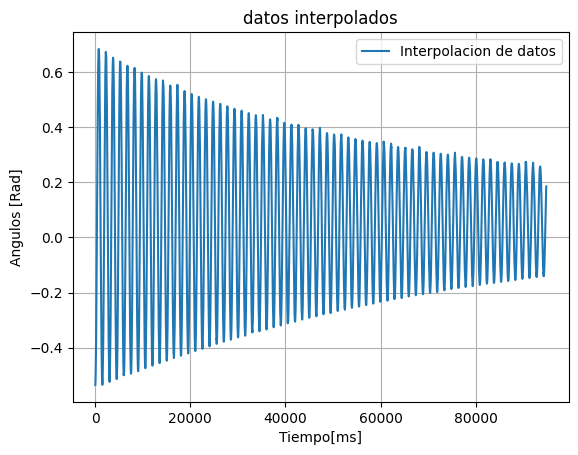

In [ ]:
x=  np.array(data['Tiempo[ms]'])
y = np.array(data['AnguloRad'])
cs = CubicSpline(x,y) ''' primero utilizamos cubispline para garantizar una funcion que pase por todos los puntos y
utilizarla en la diferencias centrales que se programó en el primer punto
'''


X = np.linspace(x[0],x[-1],1000)
plt.plot(data['Tiempo[ms]'], data['AnguloRad'], label = 'Interpolacion de datos')
plt.title('datos interpolados')
plt.xlabel('Tiempo[ms]')
plt.ylabel('Angulos [Rad]')
plt.legend()
plt.grid()
plt.show()

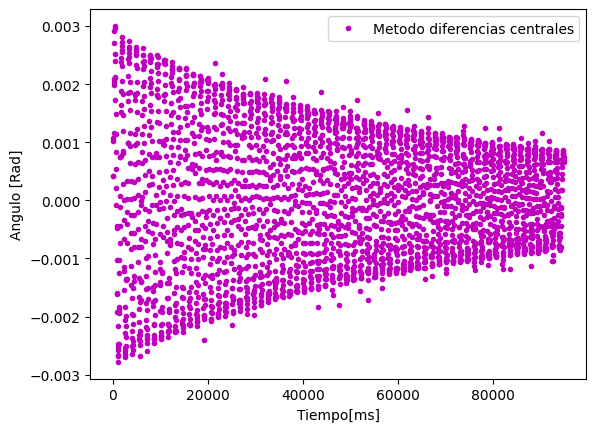

In [ ]:
deriv= diferencia_centrales(cs,x, h=1e-6)
plt.plot(x,deriv, '.m', label= 'Metodo diferencias centrales')
plt.xlabel('Tiempo[ms]')
plt.ylabel('Angulo [Rad]')
plt.legend()
plt.show()

### tercer punto

In [ ]:
import sympy as sp

z= sp.Symbol('z')
R= sp.Symbol('R')
def potencial(z,R):
  return 1/sp.sqrt(((z**2)+(R**2)))

d_campo= -sp.diff(potencial(z,R),z)
campo= sp.lambdify([z,R], d_campo)
d_campo

z/(R**2 + z**2)**(3/2)

In [ ]:
#calcular el campo en z=0.0001
print(f'el campo en z=0.0001 es {campo(0.0001,0.0001)}')

el campo en z=0.0001 es 35355339.05932738


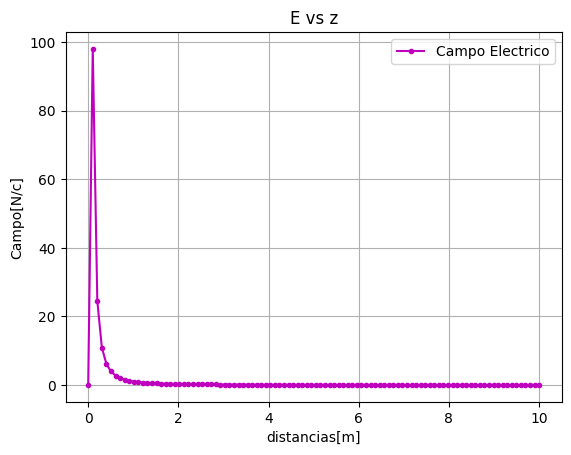

In [ ]:
zs= np.linspace(0,10,100)
plt.plot(zs, campo(zs,0.0001), '.m-',label= 'Campo Electrico')
plt.title('E vs z')
plt.xlabel('distancias[m]')
plt.ylabel('Campo[N/c]')
plt.legend()
plt.grid()
plt.show()